# One Trial Social NWB Tutorial

This tutorial demonstrates how to load and explore an NWB file containing only behavioral data from the one trial social experiment, part of the [Rat Behavioural Phenotyping Pipeline Methodologies](https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/).

Contents:

- [Reading NWBFile locally](#read-nwb)
- [Access Subject Metadata](#access-subject)
- [Access Devices Metadata](#access-devices)
- [Access Behavioral Videos](#access-behavior)
- [Access USV Data](#access-usv)
- [Access Annotated Behavioral Events](#access-events)



# Reading an NWB file locally<a id="read-nwb"></a>


This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.

In [1]:
from pynwb import NWBHDF5IO
from pathlib import Path
# Define the path to the NWB file
directory = Path("D:/kind_lab_conversion_nwb/1_trial_social")
session_id = "1TS_Test"
subject_id = "635_Arid1b(11)"
nwbfile_path = directory / f"sub-{subject_id}_ses-{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
nwbfile = io.read()

In [2]:
print(nwbfile.experiment_description)

This experiment is part of the Rat Behavioural Phenotyping Pipeline Methodologies https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/.
As an initial effort to characterize the rat lines, these models are being behaviorally phenotyped at SIDB. 
Rat models are phenotyped according to a rigorous pipeline that assesses behaviours relevant to autism with intellectual disability, such as social and motor skills, and learning and sensory processing. 
Different cohorts of rats are run through different subsets of tasks to overcome potential order effects on behaviours and to limit the number of tasks each animal is put through.
This experiment investigated social interaction behavior in different rat models 
(Arid1b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394518, 
Grin2b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394515, 
Scn2a: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=25394530).
The experimenter was, blind to genotype throughout, wa

In [3]:
print(nwbfile.session_description)

Experimental Day 3. Individual habituation.
The subject received a test trial of 15 min duration in which the rat was placed into the arena for 5 min, 
and then an unfamiliar same-sex rat was introduced to the arena into the opposite corner to which the test rat was. 
After 10 min together, the test rat was removed from arena first and placed into a clean holding cage to avoid transferring any odours to his cage mates. 
Then the stimulus rat was then removed and placed back into its home cage. 
Stimulus rats could be used up to two times with different test rats within a day, with at least 1 hr between trials. 
Stimulus rats were not used in more than 3 experiments.



Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from the Freeze_Log.xls table.

In [4]:
print(nwbfile.session_start_time)

2023-11-15 11:03:45+01:00


# Access Subject Metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [5]:
nwbfile.subject

subject pynwb.file.Subject at 0x1956339166160
Fields:
  age__reference: birth
  date_of_birth: 2023-08-27 00:00:00+02:00
  sex: F
  species: Rattus norvegicus
  subject_id: 635_Arid1b(11)

# Access Devices Metadata <a name="access-devices"></a>

This section demonstrates how to access the [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field in an NWB file.

The [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field can be accessed as `nwbfile.devices`.

In [6]:
nwbfile.devices["Arena"]

Arena pynwb.device.Device at 0x1956339157712
Fields:
  description: Custom built arena (60x60 cm) with white laminated wood walls and floor
  manufacturer: Kanya UK

In [7]:
nwbfile.devices["USVMicrophone"]

USVMicrophone pynwb.device.Device at 0x1956339164768
Fields:
  description: M500 USB Pettersson microphone for recording ultrasonic vocalizations, hanging approx. 1.5 m above the arena.
  manufacturer: Pettersson, Wildlife Services UK

In [8]:
nwbfile.devices["BehavioralCamera"]

BehavioralCamera pynwb.device.Device at 0x1956339056272
Fields:
  description: CCTV camera mounted on ceiling above arena for behavioral recording
  manufacturer: Example Manufacturer

# Access Behavioral Video <a name="access-behavior"></a>

The behavioral video is stored as an external `ImageSeries` in the NWB file.

In [9]:
video = nwbfile.acquisition["BehavioralVideo"]
video

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,undefined
Data type,object
Shape,"(1,)"
Array size,8.00 bytes
Chunk shape,None


The video filepath:

In [10]:
video.external_file[0]

'D:\\Kind-CN-data-share\\behavioural_pipeline\\1 Trial Social\\Arid1b\\Arid1b(11)_1TS\\Test\\converted\\2023-11-15 11-03-45_635.mp4'

The metadata of the device used to record the behavioral video:


In [11]:
video.device

BehavioralCamera pynwb.device.Device at 0x1956339056272
Fields:
  description: CCTV camera mounted on ceiling above arena for behavioral recording
  manufacturer: Example Manufacturer

# Access Annotated Behavioral Events <a name="access-events"></a>

The `nwbfile.processing["events]` contains annotated events. These are stored in the `AnnotatedEventsTable` type. The `AnnotatedEventsTable` type is a subtype of `DynamicTable`, where each row corresponds to a different event type. The table has a ragged (variable-length) 1D column of event times, such that each event type (row) is associated with an array of event times

You can convert the table to a `pandas.DataFrame` for easier exploration:


In [12]:
behavioral_events = nwbfile.processing["events"]["AnnotatedBehavioralEvents"].to_dataframe()

In [13]:
behavioral_events

,duration,event_times,label,event_description
id,,,,
0,"[10.050000000000011, 5.315999999999974, 45.016...","[341.533, 356.117, 363.033, 414.317, 427.05, 4...",interaction,when test rat interact with stim rat
1,"[4.334000000000003, 1.6829999999999927, 1.6159...","[347.233, 367.117, 378.017, 415.35, 427.35, 44...",reciprocate,when stimulus rat interact during an interacti...


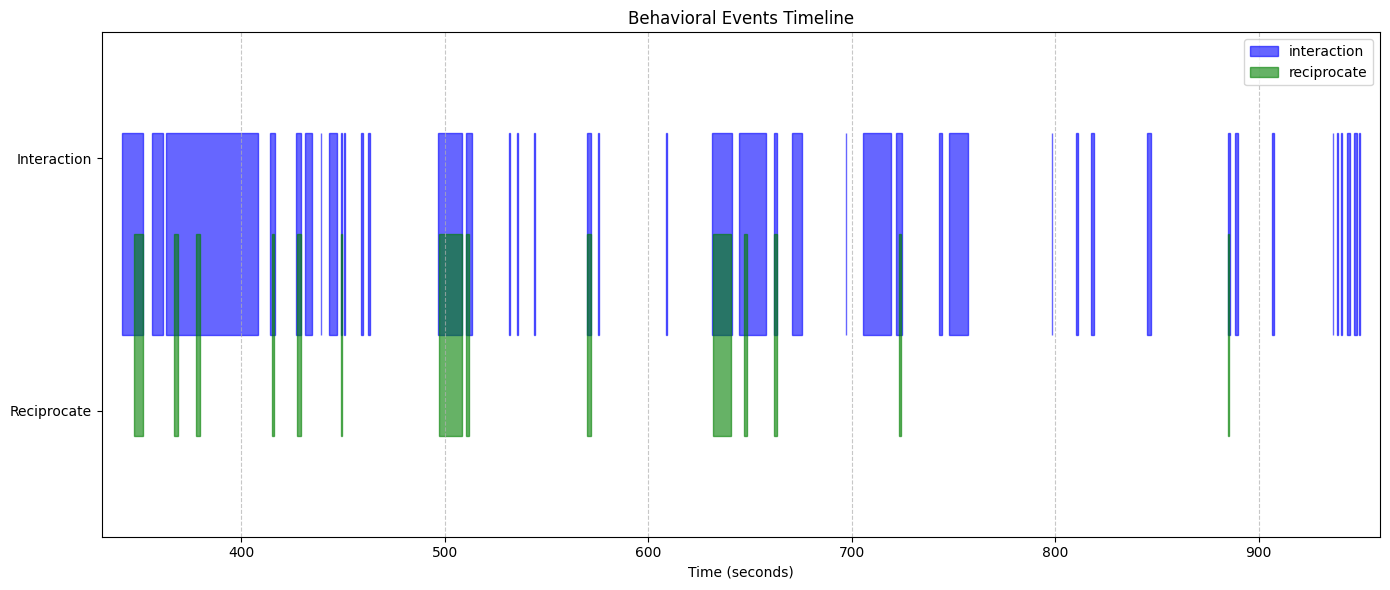

In [14]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Define colors for each event type
colors = {'interaction': 'blue', 'reciprocate': 'green'}

# Define y-positions for each event type
y_positions = {'interaction': 0.7, 'reciprocate': 0.3}

# Loop through each row in the behavioral events dataframe
for idx, row in behavioral_events.iterrows():
    label = row['label']
    times = np.array(row['event_times'])
    durations = np.array(row['duration'])
    
    # Plot each event as a rectangle
    for i, (time, duration) in enumerate(zip(times, durations)):
        rect = patches.Rectangle(
            (time, y_positions[label] - 0.4),
            duration,
            0.8,
            linewidth=1,
            edgecolor=colors[label],
            facecolor=colors[label],
            alpha=0.6,
            label=label if i == 0 else ""
        )
        ax.add_patch(rect)

# Set axis limits and labels
min_time = min([min(row['event_times']) for _, row in behavioral_events.iterrows()]) - 10
max_time = max([max(np.array(row['event_times']) + np.array(row['duration'])) 
                for _, row in behavioral_events.iterrows()]) + 10

ax.set_xlim(min_time, max_time)
ax.set_ylim(-0.5, 1.5)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Reciprocate', 'Interaction'])
ax.set_xlabel('Time (seconds)')
ax.set_title('Behavioral Events Timeline')

# Add a legend without duplicate labels
handles, labels = [], []
for label, color in colors.items():
    patch = patches.Patch(color=color, label=label, alpha=0.6)
    handles.append(patch)
    labels.append(label)
ax.legend(handles, labels, loc='upper right')

# Add gridlines for better readability
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()